In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
PATH = "drive/MyDrive/Group Project - Cellular IoT Handoff/better_csvs"
os.listdir(PATH)

['board-1669508088-mobility_driving_desert5_11_26_2022',
 'board-1669508088-mobility_driving_desert6_11_26_2022_2',
 'board-1669508088-mobility_driving_desert6_11_26_2022_1',
 'board-1669263405-mobility_driving2_11_23_2022',
 'board-1669926487-mobility_walking_ucla1_12_1_2022',
 'board-1669149465-mobility_walking_REAL_attempt5_11_22_2022',
 'board-1669928025-mobility_walking_ucla2_12_1_2022',
 'board-1669940282-mobility_walking_ucla3_12_1_2022']

In [3]:
w_df = pd.DataFrame(columns = ["msg_type", "latency"])
d_df = pd.DataFrame(columns = ["msg_type", "latency"])

In [4]:
for dir in os.listdir(PATH)[2:]:
  if "walking" in dir:
    for file in os.listdir(PATH + "/" + dir):
      name = file[(file.index("2022_")+5):-4]
      f = open(PATH + "/" + dir + "/" + file, "r")
      myline = f.readline()
      while myline:
        try:
          myline = f.readline()
          to_add = float(myline[:-1])
          w_df.loc[len(w_df.index)] = [name,to_add] 
        except:
          continue



In [5]:
len(w_df)

2150

In [6]:
w_df.head()

,msg_type,latency
0,handover_connection_reconfiguration_to_connect...,961.067
1,handover_connection_reconfiguration_to_connect...,961.065
2,handover_connection_reconfiguration_to_connect...,959.034
3,handover_connection_reconfiguration_to_connect...,961.127
4,handover_connection_reconfiguration_to_connect...,920.003


In [7]:
for dir in os.listdir(PATH)[2:]:
  if "driving" in dir:
    for file in os.listdir(PATH + "/" + dir):
      name = file[(file.index("2022_")+5):-4]
      f = open(PATH + "/" + dir + "/" + file, "r")
      myline = f.readline()
      while myline:
        try:
          myline = f.readline()
          to_add = float(myline[:-1])
          d_df.loc[len(d_df.index)] = [name,to_add] 
        except:
          continue

In [8]:
len(d_df)

1055

In [9]:
d_df.head()

,msg_type,latency
0,esm_information_request_to_esm_information_res...,999.326
1,security_mode_command_to_security_mode_complete,1.207
2,security_mode_command_to_security_mode_complete,2.000
3,security_mode_command_to_security_mode_complete,0.000
4,security_mode_command_to_security_mode_complete,1.018


In [10]:
drive_but_not_walk = []
for x in d_df["msg_type"].unique():
  if x not in w_df["msg_type"].unique():
    drive_but_not_walk.append(x)
    print(x)

authentication_request_to_authentication_response
authentication_response_to_security_mode_command


In [11]:
walk_but_not_drive = []
for x in w_df["msg_type"].unique():
  if x not in d_df["msg_type"].unique():
    walk_but_not_drive.append(x)
    print(x)

active_pdn_connectivity_request_to_activate_default_eps_bearer_context_request
idle_pdn_connectivity_request_to_activate_default_eps_bearer_context_request
activate_default_eps_bearer_context_request_to_attach_complete
esm_information_response_to_attach_accept
active_activate_default_eps_bearer_context_request_to_activate_default_eps_bearer_context_accept
attach_complete_to_pdn_connectivity_request
idle_activate_default_eps_bearer_context_request_to_activate_default_eps_bearer_context_accept


In [12]:
common_vals = []
for x in w_df["msg_type"].unique():
  if x in d_df["msg_type"].unique():
    common_vals.append(x)
    print(x)

handover_connection_reconfiguration_to_connection_reconfiguration_complete
connection_setup_to_connection_setup_complete
non_handover_connection_reconfiguration_to_connection_reconfiguration_complete
connection_setup_complete_to_security_mode_command
security_mode_command_to_security_mode_complete
service_request_to_pdn_connectivity_request
esm_information_request_to_esm_information_response
handover_measurement_report_to_connection_reconfiguration
non_handover_security_mode_complete_to_connection_reconfiguration
connection_request_to_connection_setup
service_request_to_tracking_area_update_request
tracking_area_update_request_to_tracking_area_update_accept


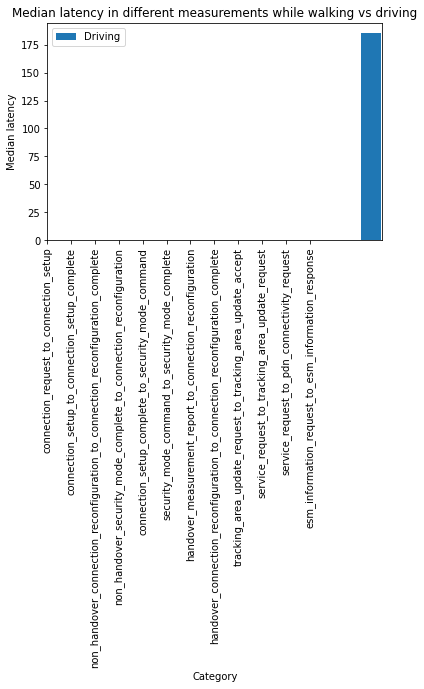

In [13]:
index = np.arange(len(common_vals))
bar_width = 0.07 * len(common_vals)
fig, ax = plt.subplots()
driving = ax.bar(len(d_df["msg_type"].value_counts()), d_df["msg_type"].value_counts(), bar_width,label="Driving")

# waking = ax.bar(len(w_df["type"].value_counts()), w_df["type"].value_counts(), bar_width,label="Walking")

ax.set_xlabel('Category')
ax.set_ylabel('Median latency')
ax.set_title('Median latency in different measurements while walking vs driving')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(d_df["msg_type"].value_counts().index.to_list(), rotation = 90)
ax.legend()

plt.show()

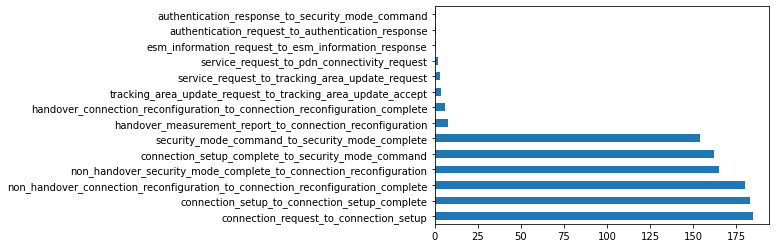

In [14]:
d_df['msg_type'].value_counts().plot(kind='barh')

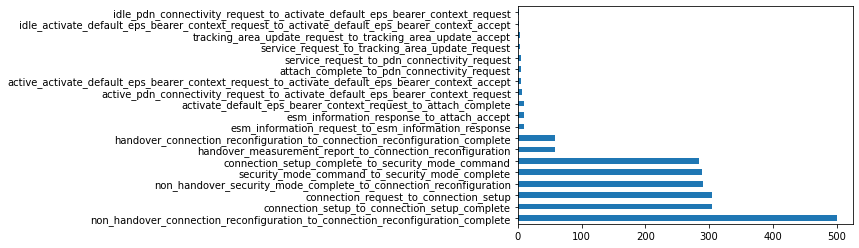

In [15]:
w_df['msg_type'].value_counts().plot(kind='barh')

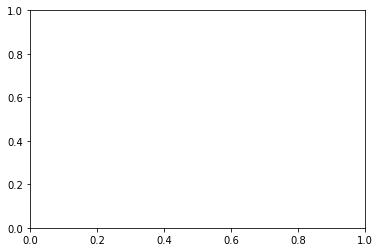

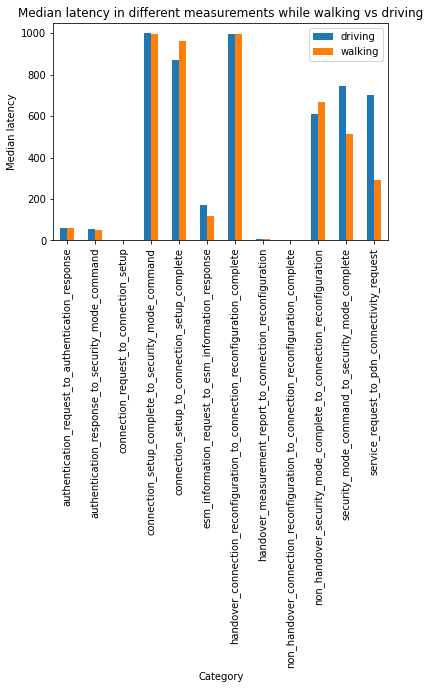

In [16]:
fig, ax = plt.subplots()
d_df_common = d_df[d_df['msg_type'].isin(common_vals)].sort_values(by=['msg_type'])
w_df_common = w_df[w_df['msg_type'].isin(common_vals)].sort_values(by=['msg_type'])
driving_medians = d_df_common.groupby(d_df_common.msg_type)[['latency']].median()["latency"]
walking_medians = w_df_common.groupby(w_df_common.msg_type)[['latency']].median()["latency"]
# driving = ax.bar( d_df.groupby(d_df.msg_type)[['latency']].median(), bar_width,label="Driving")
to_plot = pd.DataFrame({'driving': driving_medians,'walking': walking_medians}, index=sorted(common_vals))
ax = to_plot.plot.bar(rot=0)
ax.set_xlabel('Category')
ax.set_ylabel('Median latency')
ax.set_title('Median latency in different measurements while walking vs driving')
# ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(sorted(d_df["msg_type"].value_counts().index.to_list()), rotation = 90)
ax.legend()

plt.show()

In [17]:
d_df["msg_type"].value_counts().index.to_list()

['connection_request_to_connection_setup',
 'connection_setup_to_connection_setup_complete',
 'non_handover_connection_reconfiguration_to_connection_reconfiguration_complete',
 'non_handover_security_mode_complete_to_connection_reconfiguration',
 'connection_setup_complete_to_security_mode_command',
 'security_mode_command_to_security_mode_complete',
 'handover_measurement_report_to_connection_reconfiguration',
 'handover_connection_reconfiguration_to_connection_reconfiguration_complete',
 'tracking_area_update_request_to_tracking_area_update_accept',
 'service_request_to_tracking_area_update_request',
 'service_request_to_pdn_connectivity_request',
 'esm_information_request_to_esm_information_response',
 'authentication_request_to_authentication_response',
 'authentication_response_to_security_mode_command']

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[Text(0, 0, 'connection_request_to_connection_setup'),
 Text(0, 0, 'connection_setup_complete_to_security_mode_command'),
 Text(0, 0, 'connection_setup_to_connection_setup_complete'),
 Text(0, 0, 'esm_information_request_to_esm_information_response'),
 Text(0, 0, 'handover_connection_reconfiguration_to_connection_reconfiguration_complete'),
 Text(0, 0, 'handover_measurement_report_to_connection_reconfiguration'),
 Text(0, 0, 'non_handover_connection_reconfiguration_to_connection_reconfiguration_complete'),
 Text(0, 0, 'non_handover_security_mode_complete_to_connection_reconfiguration'),
 Text(0, 0, 'security_mode_command_to_security_mode_complete'),
 Text(0, 0, 'service_request_to_pdn_connectivity_request'),
 Text(0, 0, 'service_request_to_tracking_area_update_request'),
 Text(0, 0, 'tracking_area_update_request_to_tracking_area_update_accept')]

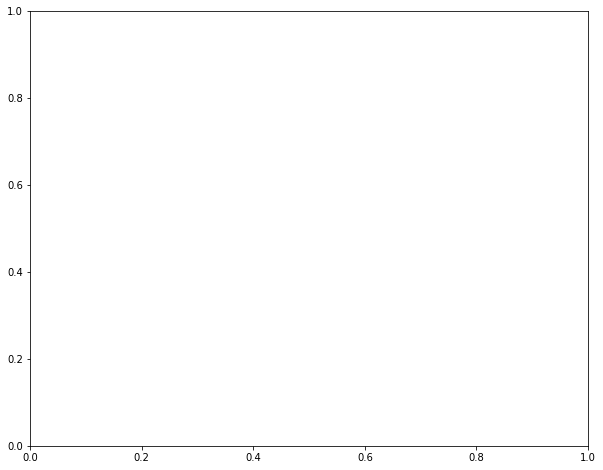

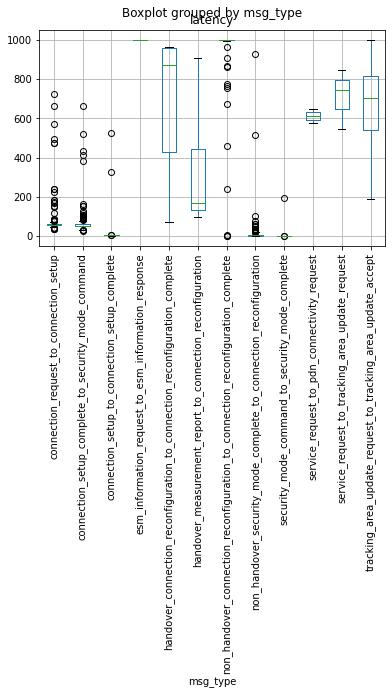

In [18]:
ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
ax = d_df_common.boxplot(column='latency',by='msg_type')
ax.set_xticklabels(sorted(d_df_common["msg_type"].value_counts().index.to_list()), rotation = 90)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[Text(0, 0, 'connection_request_to_connection_setup'),
 Text(0, 0, 'connection_setup_complete_to_security_mode_command'),
 Text(0, 0, 'connection_setup_to_connection_setup_complete'),
 Text(0, 0, 'esm_information_request_to_esm_information_response'),
 Text(0, 0, 'handover_connection_reconfiguration_to_connection_reconfiguration_complete'),
 Text(0, 0, 'handover_measurement_report_to_connection_reconfiguration'),
 Text(0, 0, 'non_handover_connection_reconfiguration_to_connection_reconfiguration_complete'),
 Text(0, 0, 'non_handover_security_mode_complete_to_connection_reconfiguration'),
 Text(0, 0, 'security_mode_command_to_security_mode_complete'),
 Text(0, 0, 'service_request_to_pdn_connectivity_request'),
 Text(0, 0, 'service_request_to_tracking_area_update_request'),
 Text(0, 0, 'tracking_area_update_request_to_tracking_area_update_accept')]

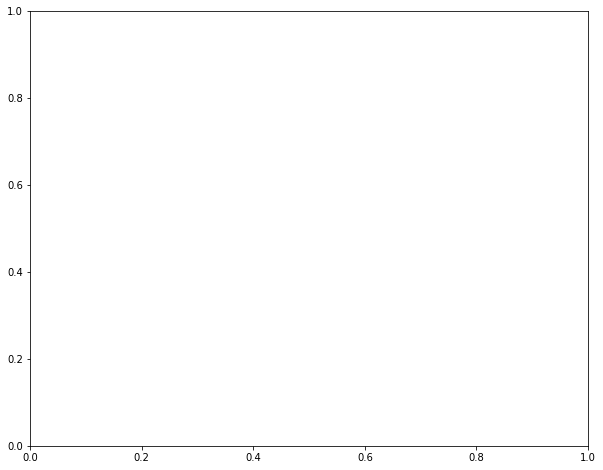

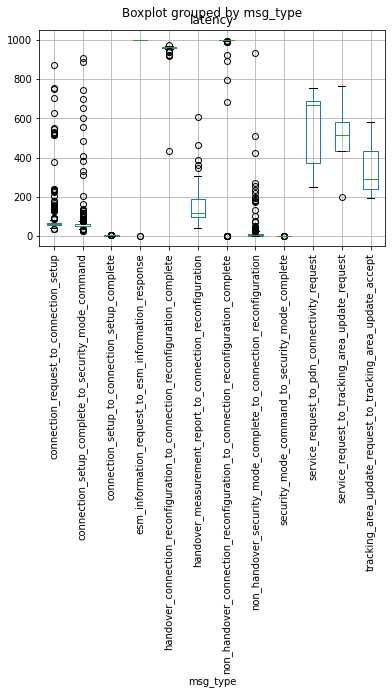

In [19]:
ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
ax = w_df_common.boxplot(column='latency',by='msg_type')
ax.set_xticklabels(sorted(w_df_common["msg_type"].value_counts().index.to_list()), rotation = 90)

[Text(0, 0, 'authentication_request_to_authentication_response'),
 Text(0, 0, 'authentication_response_to_security_mode_command')]

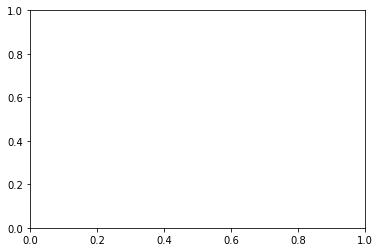

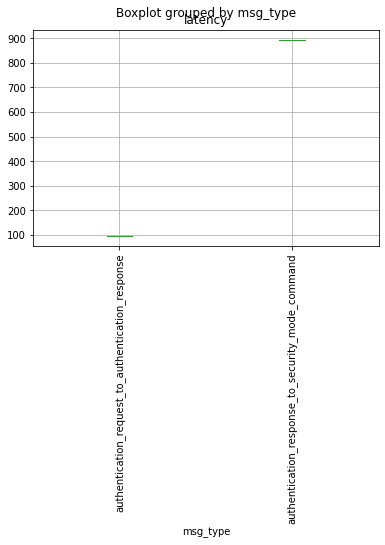

In [20]:
#MESSAGES I DRIVING ONLY
fig, ax = plt.subplots()
d_df_only = d_df[d_df['msg_type'].isin(drive_but_not_walk)].sort_values(by=['msg_type'])
ax = d_df_only.boxplot(column='latency',by='msg_type')
ax.set_xticklabels(sorted(d_df_only["msg_type"].value_counts().index.to_list()), rotation = 90)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[Text(0, 0, 'activate_default_eps_bearer_context_request_to_attach_complete'),
 Text(0, 0, 'active_activate_default_eps_bearer_context_request_to_activate_default_eps_bearer_context_accept'),
 Text(0, 0, 'active_pdn_connectivity_request_to_activate_default_eps_bearer_context_request'),
 Text(0, 0, 'attach_complete_to_pdn_connectivity_request'),
 Text(0, 0, 'esm_information_response_to_attach_accept'),
 Text(0, 0, 'idle_activate_default_eps_bearer_context_request_to_activate_default_eps_bearer_context_accept'),
 Text(0, 0, 'idle_pdn_connectivity_request_to_activate_default_eps_bearer_context_request')]

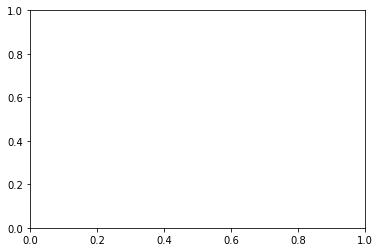

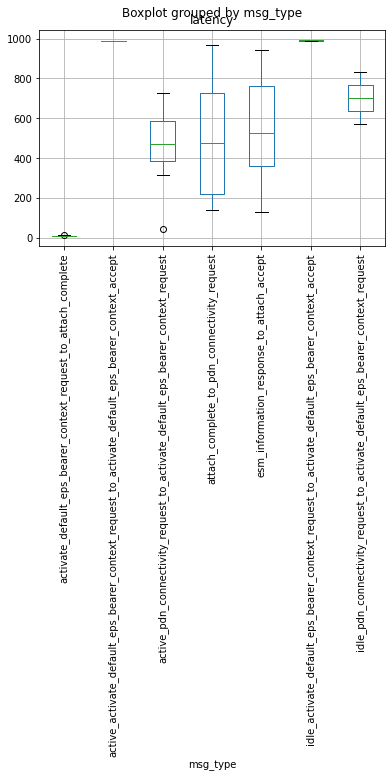

In [21]:
#MESSAGES IN WALKING ONLY
fig, ax = plt.subplots()
w_df_only = w_df[w_df['msg_type'].isin(walk_but_not_drive)].sort_values(by=['msg_type'])
ax = w_df_only.boxplot(column='latency',by='msg_type')
ax.set_xticklabels(sorted(w_df_only["msg_type"].value_counts().index.to_list()), rotation = 90)

In [22]:
w_df_only

,msg_type,latency
789,activate_default_eps_bearer_context_request_to...,10.755
787,activate_default_eps_bearer_context_request_to...,11.052
1715,activate_default_eps_bearer_context_request_to...,8.920
396,activate_default_eps_bearer_context_request_to...,10.058
397,activate_default_eps_bearer_context_request_to...,11.084
398,activate_default_eps_bearer_context_request_to...,9.999
1716,activate_default_eps_bearer_context_request_to...,10.001
788,activate_default_eps_bearer_context_request_to...,11.289
1717,activate_default_eps_bearer_context_request_to...,12.874
790,active_activate_default_eps_bearer_context_req...,987.873


In [23]:
len(common_vals)

12

In [24]:
d_df.groupby(d_df.msg_type)[['latency']].median()

,latency
msg_type,
authentication_request_to_authentication_response,96.0920
authentication_response_to_security_mode_command,893.9690
connection_request_to_connection_setup,58.2090
connection_setup_complete_to_security_mode_command,53.6950
connection_setup_to_connection_setup_complete,3.9900
esm_information_request_to_esm_information_response,999.3260
handover_connection_reconfiguration_to_connection_reconfiguration_complete,873.0665
handover_measurement_report_to_connection_reconfiguration,168.7730
non_handover_connection_reconfiguration_to_connection_reconfiguration_complete,996.8735


In [25]:
d_df["msg_type"].value_counts()

connection_request_to_connection_setup                                            185
connection_setup_to_connection_setup_complete                                     183
non_handover_connection_reconfiguration_to_connection_reconfiguration_complete    180
non_handover_security_mode_complete_to_connection_reconfiguration                 165
connection_setup_complete_to_security_mode_command                                162
security_mode_command_to_security_mode_complete                                   154
handover_measurement_report_to_connection_reconfiguration                           8
handover_connection_reconfiguration_to_connection_reconfiguration_complete          6
tracking_area_update_request_to_tracking_area_update_accept                         4
service_request_to_tracking_area_update_request                                     3
service_request_to_pdn_connectivity_request                                         2
esm_information_request_to_esm_information_response   

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


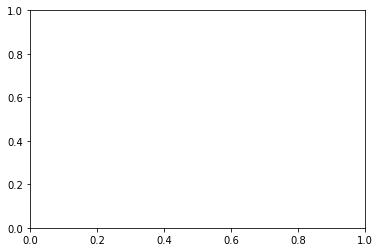

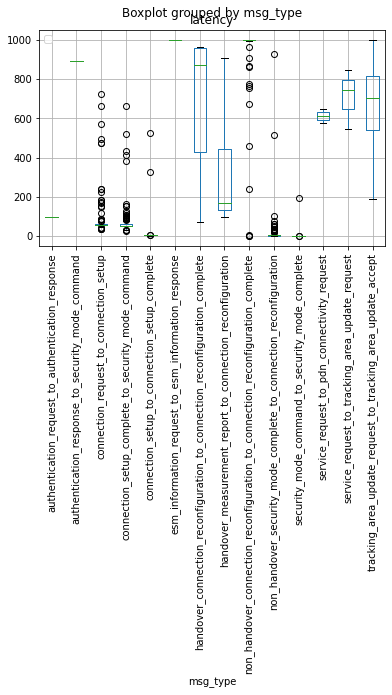

In [26]:
fig, ax = plt.subplots()
d_df_whole = d_df.sort_values(by=['msg_type'])

plt.suptitle('')
ax = d_df_whole.boxplot(column='latency',by='msg_type')
ax.set_xticklabels(sorted(d_df["msg_type"].value_counts().index.to_list()), rotation = 90)
ax.legend()

plt.show()

In [27]:
w_df_whole = w_df.sort_values(by=['msg_type'])

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


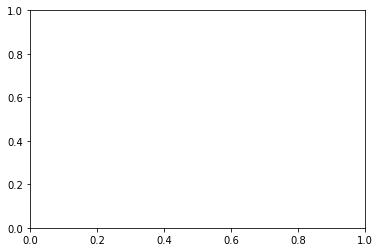

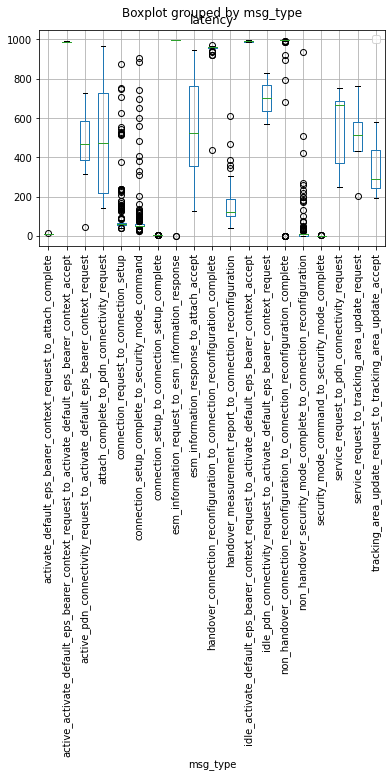

In [28]:
fig, ax = plt.subplots()
w_df_whole = w_df.sort_values(by=['msg_type'])

plt.suptitle('')
ax = w_df_whole.boxplot(column='latency',by='msg_type')
ax.set_xticklabels(sorted(w_df["msg_type"].value_counts().index.to_list()), rotation = 90)
ax.legend()

plt.show()